In [ ]:
'''
【项目05】  多场景下的算法构建

课程数据：
某公司A,B产品在2018年1,2,3月的销量数据，数据格式为xlsx

作业要求：
1、批量读取数据，并输出以下信息
（1）数据量
（2）数据字段columns
（3）输出每个文件分别有多少缺失值
要求：
① 创建独立函数，从读取数据到以上输出要求
② 运行代码多次调用创建函数，对数据进行批量处理
提示：
① 将课程excel数据放入单独文件夹(建议英文路径)，函数中通过input来输入excel数据所在文件夹路径，再通过遍历来读取文件
② pd.read_excel()中用“index_col”参数，将第一列变为index
③ os.walk(path) → 返回路径中的信息及文件，结果为一个生成器
④ 定位缺失值位置：data[data.isnull().values == True]

2、批量读取数据，用均值填充缺失值数据，并完成以下计算及图表制作
（1）读取数据并用均值填充缺失值；对“日期”字段进行时间序列处理，转换成日period ，最后输出三个Dataframe文件data1,data2,data3
（2）分别计算data1，data2，data3中A,B产品的月总销量，并绘制多系列柱状图，存储在对应的图片文件夹路径
（3）分别计算A产品在每个月中哪一天超过了月度80%的销量，输出日期
要求：
① 分别创建四个函数，对应完成上述需求
② 数据文件夹路径和图片存储路径不要相同
提示：
① 时间序列转换方法提示：pd.to_period
② 时间戳Timestampe转化成字符串用str()方法

3、读取数据并合并，做散点图观察A,B产品销量，并做回归，预测当A销量为1200时，B产品销量值
（1）读取数据删除缺失值；对“日期”字段进行时间序列处理，转换成日period ，合并三个月数据，输出data；
（2）针对A产品销量和B产品销量数据做回归分析，制作散点图并存储，并预测当A销量为1200时，B产品销量值
要求：
① 分别创建两个函数，对应完成上述需求
② 数据文件夹路径和图片存储路径不要相同
提示：
① 用pd.dripna方法去掉缺失值，注意inplace参数

'''

In [75]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import os
% matplotlib inline
path = r'D:\BaiduNetdiskDownload\项目05'
def upload_data():
    floder = os.walk(path)
    name=[]
    for root,dirs,files in floder:
        for files in files:
            name.append(os.path.join(root,files))
    n=1
    for i in name:
        load = pd.read_excel(i,index_col=0)
        col_name = load.columns.tolist()
        nan_counts = len(load[load.isnull().values==True])
        print('第%i个数据量为%i'%(n,len(load)))
        print('第%i个数据字段为:'%n,col_name)
        print('第%i个缺失值为%i'%(n,nan_counts))
        n+=1
upload_data()
        

第1个数据量为31
第1个数据字段为: ['productA', 'productB']
第1个缺失值为3
第2个数据量为28
第2个数据字段为: ['productA', 'productB']
第2个缺失值为4
第3个数据量为31
第3个数据字段为: ['productA', 'productB']
第3个缺失值为3


                sum_a         sum_b
2018-01  17774.318140  20634.984309
2018-02  16825.563937  17644.780874
2018-03  19867.499953  21840.054395


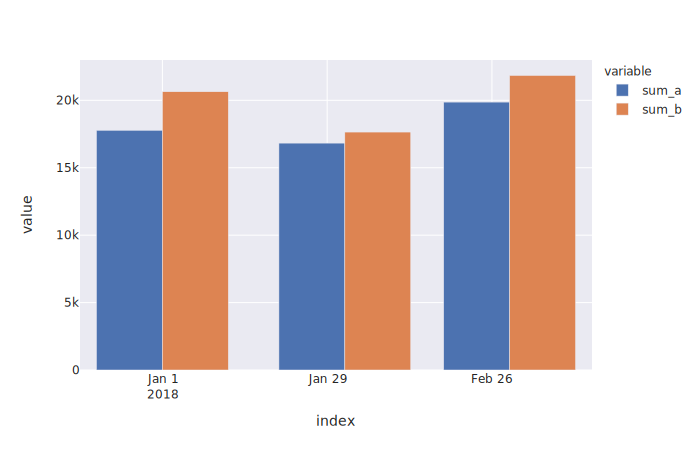

[Timestamp('2018-01-26 00:00:00'),
 Timestamp('2018-02-23 00:00:00'),
 Timestamp('2018-03-25 00:00:00')]

In [63]:

floder = os.walk(path)
name=[]
for root,dirs,files in floder:
    for files in files:
        name.append(os.path.join(root,files))
data=[]
for i in name:
    load = pd.read_excel(i,index_col=0)
    load.to_period()
    load.iloc[:,0].fillna(load.iloc[:,0].mean(),inplace=True)
    load.iloc[:,1].fillna(load.iloc[:,1].mean(),inplace=True)
    data.append(load)


def pic():
    A_file=r'D:\BaiduNetdiskDownload\项目05_prod'
    sale_a = []
    sale_b = []
    for i in data:
        sale_a.append(i.iloc[:,0].sum())
        sale_b.append(i.iloc[:,1].sum())
    df = pd.DataFrame({'sum_a':sale_a,'sum_b':sale_b},index=pd.period_range('201801','201803',freq='M'))
    df.index=df.index.astype(str)
    print(df)
    fig = px.bar(df,x=df.index,y=['sum_a','sum_b'],barmode='group',template='seaborn')
    fig.show(renderer='svg')
pic()

def cusum_a():
    target_data=[]
    for i in data:
        i['a_percent'] = i.iloc[:,0].cumsum()/i.iloc[:,0].sum()
        target_data.append(i[i['a_percent']>0.8].index[0])
    return target_data
cusum_a()

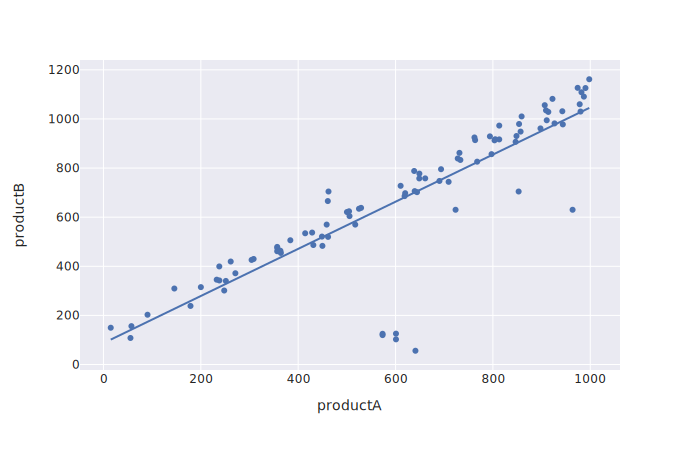

0.7553285500877487


array([1253.44720289])

In [95]:
data_full = pd.concat([data[0],data[1],data[2]])
data_full.dropna(inplace=True)
lig = px.scatter(data_full,x='productA',y='productB',template='seaborn',trendline="ols")
lig.show(renderer='svg')
X=data_full['productA'].values.reshape(-1,1)
y=data_full['productB']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1,test_size=0.75)
model = LinearRegression()
model.fit(X_train,y_train)
print(model.score(X_test,y_test))
model.predict(1200)